In [354]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
df = pd.read_parquet("data/cnb_vyber.parquet")
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))
df = df[df['rok'].notnull()]

In [355]:
df = df[~df['100_7'].isnull()]

In [356]:
df['100_7']

001
bk190900003       jn19990002507
bk191000003       jn20000601987
bk191702339          jk01011993
bk191901222          jk01052916
bk191901223          jk01062651
                      ...      
web20132441382    uzp2008465461
web20142610247     ola200208505
web20162827146    js20131029003
zb00389              jk01091156
zb9300147             xx0013168
Name: 100_7, Length: 633012, dtype: object

In [357]:
wikid = pd.read_parquet(os.path.join('data','wikidata.parquet'))
wikid = wikid[['w_umrti','w_narozeni','obcanstvi']]

In [358]:
wikid

,w_umrti,w_narozeni,obcanstvi
jk01010005,1960.0,1877.0,"[Československo, Předlitavsko]"
jk01010022,1971.0,1890.0,[Československo]
jk01010023,2008.0,1928.0,[Československo]
jk01010026,1974.0,1889.0,[Československo]
jk01010030,1599.0,1546.0,[Čechy]
...,...,...,...
zmp2016925673,NaN,1954.0,[Spojené státy americké]
zmp2016925675,1870.0,1791.0,None
zmp20191037071,NaN,1986.0,"[Spojené státy americké, Německo]"
zmp20191054500,1943.0,1902.0,[Německá říše]


In [359]:
len(df)

633012

In [360]:
df = df.merge(wikid, left_on='100_7', right_index=True, how='left')

In [361]:
len(df)

633012

In [362]:
df = df[df['obcanstvi'].astype(str).str.contains('Česk')]

In [363]:
len(df)

181826

In [364]:
def narozeni(radek):
    if radek['100_d'] != None:
        if '-' in radek['100_d']:
            if len(radek['100_d'].split('-')[0]) == 4:
                return pd.to_numeric(radek['100_d'].split('-')[0])
    elif radek['w_narozeni'] != None:
        return pd.to_numeric(radek['w_narozeni'])

In [365]:
def umrti(radek):
    if radek['100_d'] != None:
        if '-' in radek['100_d']:
            if len(radek['100_d'].split('-')[1]) == 4:
                return pd.to_numeric(radek['100_d'].split('-')[1])
    elif radek['w_umrti'] != None:
        return pd.to_numeric(radek['w_umrti'])

In [366]:
df['narozeni'] = df.apply(lambda row: narozeni(row), axis=1)
df['umrti'] = df.apply(lambda row: umrti(row), axis=1)

In [367]:
df[['100_d','w_narozeni','w_umrti','narozeni','umrti']].sample(50)

,100_d,w_narozeni,w_umrti,narozeni,umrti
001,,,,,
bk193504792,1889-1961,1889.0,1961.0,1889.0,1961.0
bk195405676,1904-1970,1904.0,1970.0,1904.0,1970.0
bknhak03256,1846-1929,1846.0,1929.0,1846.0,1929.0
cpk19960167918,1964-,1964.0,NaN,1964.0,NaN
bk195804858,1925-1997,1925.0,1997.0,1925.0,1997.0
nos190126864,1832-1920,1832.0,1920.0,1832.0,1920.0
bk196001578,1907-1971,1907.0,1971.0,1907.0,1971.0
bk194203234,1890-1971,1890.0,1971.0,1890.0,1971.0
nkc20152730732,1936-2011,1936.0,2011.0,1936.0,2011.0


In [368]:
df = df[df['narozeni'] >= 1924]

In [369]:
df = df[(df['umrti'] > df['rok']) & (df['umrti'].notnull())]

In [370]:
len(df)

27791

In [371]:
df = df.sort_values(by='rok')

In [372]:
df = df.drop_duplicates(subset=['100_7','245_a'], keep='first')

In [373]:
df['100_7'].nunique()

3214

In [374]:
df

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,w_umrti,w_narozeni,obcanstvi,narozeni,umrti
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nos190227663,000816s1904 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jo20000082695,"Malý, Jan,",1954-2017,None,Návrat :,Jan Malý,None,None,None,None,None,[Praha :],"[[nákl.vl.],]",[1904],None,[(Knihtisk. nár. soc. dělnictva)],None,None,None,None,None,[199 s. ;],None,[8°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1904.0,2017.0,1954.0,[Česko],1954.0,2017.0
nos190123875,000503s1905 xr 000 | cze,None,None,[(Brožováno)],None,None,None,None,None,None,None,[aut],xx0000147,"Krušina, Zdeněk,",1963-2018,None,Šeré nálady /,Zdeněk Krušina,None,None,None,None,None,None,None,None,None,None,None,[Praha :],"[E. Lešehrad,]",[1905],[1],[18 stran ;],None,[18 cm],[Chrysanthem ;],[X],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Chrysanthem],None,None,nam a22 1i 4500,1905.0,2018.0,1963.0,[Česko],1963.0,2018.0
cpk20193157647,090831s1909 xr ||||e||||||||| ||cze||,None,None,None,None,None,None,None,None,None,"[635.047, 371, (035)]","[aut, aui]",jk01070668,"Kudrna, Karel,",1924-2014,None,"Založení, zařízení a správa školních zahrad :","sepsali Karel Kudrna, Václav Doležal",[Díl I. /],None,None,None,None,None,None,None,None,None,None,[V Chrudimi :],"[Zahrada domácí a školní,]",[1909],[1],"[158, [2] s. :]","[il., 3 obr. příl.]",None,[Knižnice školních zahrad ;],[roč. 1],[S četnými vyobrazeními a plány školních zahrad],None,None,None,None,None,None,None,None,None,None,None,None,[aui],[jk01070668],"[Kudrna, Karel,]",[1924-2014],None,None,None,None,[Knižnice školních zahrad],None,None,cam a22 i 4500,1909.0,2014.0,1924.0,"[Česko, Československo]",1924.0,2014.0
bk192604842,010107s1926 xr cze,None,None,None,None,None,None,None,None,None,None,[edt],jk01012452,"Boháč, Antonín,",1926-1992,None,Národnostní mapa republiky Československé :,Zpracoval dr. Ant. Boháč,None,None,None,None,None,[Praha :],"[Národopisná spol. československá,]",[1926],None,None,None,None,None,None,None,[1 mapa (1 list) :],[v 9 barvách ;],[83.2×190 cm (76.5×187.7 cm)],None,None,[Kresleno a vytištěno ve Voj. zeměpisném ústavu],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1926.0,1992.0,1926.0,[Československo],1926.0,1992.0
bk192900823,990917s1928 xr 000 cze,None,None,[(Brož.)],None,None,None,None,None,None,None,[aut],jn20000400454,"Demuth, Osvald,",1936-1988,None,Z historie prvního padesátiletí učitelské jedn...,Osvald Demuth,None,None,None,None,None,[[V Hradci Králové :],[O. Demuth],[1928]],None,[(Jaroslav Oma)],None,None,None,None,None,[96 s. ;],None,[16 cm],None,None,[Otištěno z časopisu Osvěta lidu v Hradci Král...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1928.0,1988.0,1936.0,[Československo],1936.0,1988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20233492679,230111s2023 xr a g 000 f cze,[978-80-7683-286-2],"[Kč 349,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-312.4)]",[aut],jn20000401683,"Macek, Miroslav,",1944-2024,None,Případ přelétavého starožitníka /,Miroslav

<Axes: xlabel='rok'>

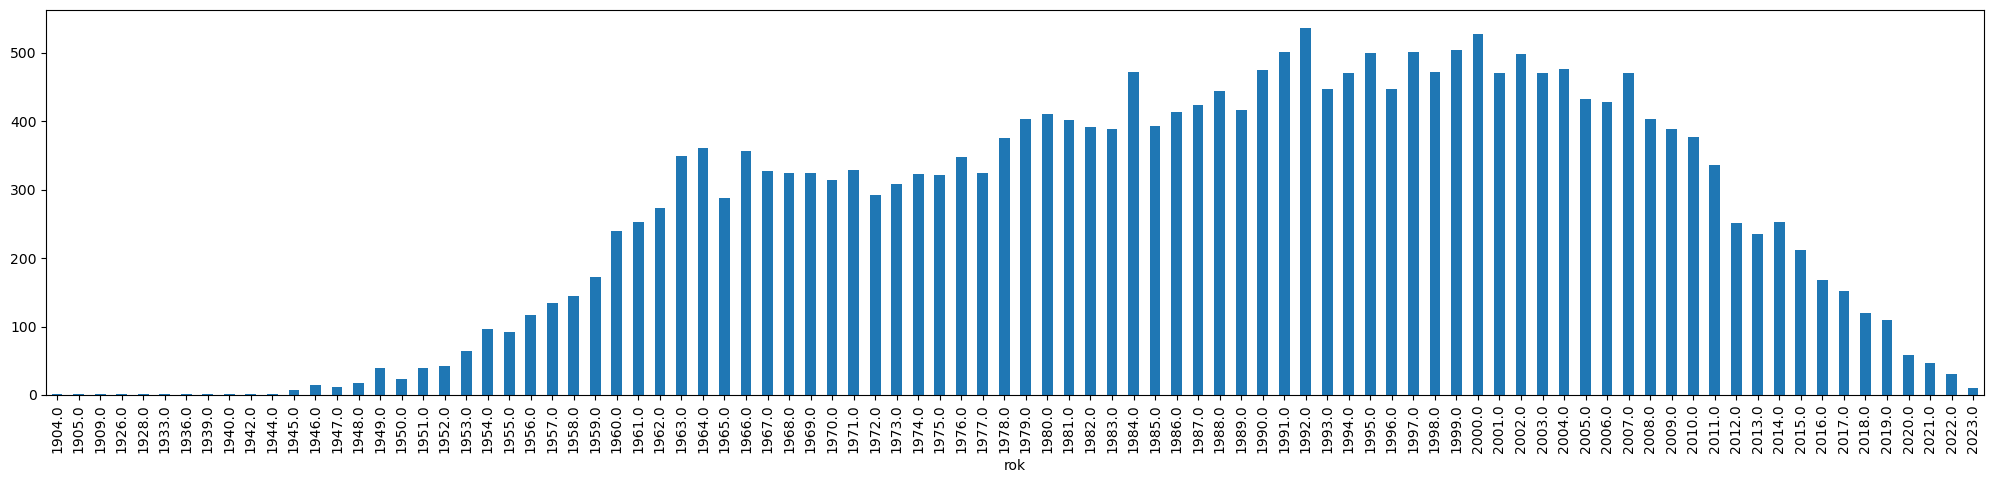

In [375]:
df.groupby('rok').size().plot.bar(figsize=(25,5))

In [376]:
df['vek'] = df['rok'] - df['narozeni']

<Axes: ylabel='Frequency'>

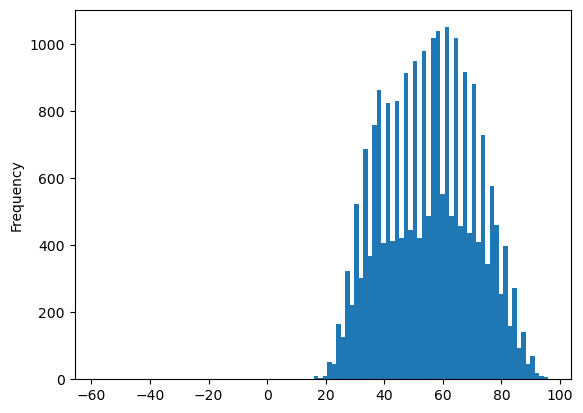

In [377]:
df['vek'].plot.hist(bins=100)

In [378]:
df[df['vek'] < 0]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,w_umrti,w_narozeni,obcanstvi,narozeni,umrti,vek
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nos190227663,000816s1904 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jo20000082695,"Malý, Jan,",1954-2017,None,Návrat :,Jan Malý,None,None,None,None,None,[Praha :],"[[nákl.vl.],]",[1904],None,[(Knihtisk. nár. soc. dělnictva)],None,None,None,None,None,[199 s. ;],None,[8°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1904.0,2017.0,1954.0,[Česko],1954.0,2017.0,-50.0
nos190123875,000503s1905 xr 000 | cze,None,None,[(Brožováno)],None,None,None,None,None,None,None,[aut],xx0000147,"Krušina, Zdeněk,",1963-2018,None,Šeré nálady /,Zdeněk Krušina,None,None,None,None,None,None,None,None,None,None,None,[Praha :],"[E. Lešehrad,]",[1905],[1],[18 stran ;],None,[18 cm],[Chrysanthem ;],[X],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Chrysanthem],None,None,nam a22 1i 4500,1905.0,2018.0,1963.0,[Česko],1963.0,2018.0,-58.0
cpk20193157647,090831s1909 xr ||||e||||||||| ||cze||,None,None,None,None,None,None,None,None,None,"[635.047, 371, (035)]","[aut, aui]",jk01070668,"Kudrna, Karel,",1924-2014,None,"Založení, zařízení a správa školních zahrad :","sepsali Karel Kudrna, Václav Doležal",[Díl I. /],None,None,None,None,None,None,None,None,None,None,[V Chrudimi :],"[Zahrada domácí a školní,]",[1909],[1],"[158, [2] s. :]","[il., 3 obr. příl.]",None,[Knižnice školních zahrad ;],[roč. 1],[S četnými vyobrazeními a plány školních zahrad],None,None,None,None,None,None,None,None,None,None,None,None,[aui],[jk01070668],"[Kudrna, Karel,]",[1924-2014],None,None,None,None,[Knižnice školních zahrad],None,None,cam a22 i 4500,1909.0,2014.0,1924.0,"[Česko, Československo]",1924.0,2014.0,-15.0
bk192900823,990917s1928 xr 000 cze,None,None,[(Brož.)],None,None,None,None,None,None,None,[aut],jn20000400454,"Demuth, Osvald,",1936-1988,None,Z historie prvního padesátiletí učitelské jedn...,Osvald Demuth,None,None,None,None,None,[[V Hradci Králové :],[O. Demuth],[1928]],None,[(Jaroslav Oma)],None,None,None,None,None,[96 s. ;],None,[16 cm],None,None,[Otištěno z časopisu Osvěta lidu v Hradci Král...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1928.0,1988.0,1936.0,[Československo],1936.0,1988.0,-8.0


In [379]:
df = df[df['vek'] > 0]

In [380]:
df[df['vek'] > 100][['100_7','100_a','245_a','100_d','rok','narozeni','umrti','vek']].drop_duplicates(subset=['100_7'],keep="first")

,100_7,100_a,245_a,100_d,rok,narozeni,umrti,vek
001,,,,,,,,


In [381]:
df = df.dropna(subset=['vek'])

In [382]:
len(df)

23396

In [383]:
df

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,w_umrti,w_narozeni,obcanstvi,narozeni,umrti,vek
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk193302228,990906s1933 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01072317,"Löbl, Karel,",1925-2021,None,Vápenná odměrka Regula /,Napsal ing. Karel Löbl,None,None,None,None,None,[Praha Karlín :],"[Havelka a Mész,]",[1933],None,None,None,None,None,None,None,[15 - [I] s. ;],None,[4°],[[Publikace] strojírny Havelka a Mész ;],[Č. II],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Publikace strojírny Havelka a Mész],None,None,nam a22 1 4500,1933.0,2021.0,1925.0,[Československo],1925.0,2021.0,8.0
bk193602034,990311s1936 xr a 000 | cze,None,None,[(Brožováno)],None,None,None,None,None,None,None,[aut],jk01051960,"Jírů, Pavel,",1929-2002,None,Březnický průmysl impregnace dřeva /,Pavel Jírů,None,None,None,None,None,None,None,None,None,None,None,[V Praze :],"[Bozeň, spolek rodáků a přátel města Březnice,]",[1936],[1],[43 stran :],[ilustrace ;],[21 cm],[Březnická knihovnička ;],[9],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Březnická knihovnička],None,None,nam a22 1i 4500,1936.0,2002.0,1929.0,[Československo],1929.0,2002.0,7.0
bk193603223,990420s1936 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jo20000071081,"Mezřický, Václav,",1934-2018,None,"Neplodnost skotu, její příčiny a tlumení /",[Napsal] MVDr. V. Mezřický,None,None,None,None,None,[V Brně :],"[Družstvo zvěrolékařů,]",[1936],None,[(Ant. Okáč)],None,None,None,None,None,[50 s. ;],None,[8°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1936.0,2018.0,1934.0,"[Československo, Česko]",1934.0,2018.0,2.0
bk193900824,990125s1939 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01040183,"Hauptman, Jaroslav,",1928-2008,None,Uhříněveský školní závod zemědělský Vysoké ško...,Jaroslav Hauptman,None,None,None,None,None,[V Praze :],"[nákladem vlastním,]",[1939],None,[(Orbis)],None,None,None,None,None,[16 s. ;],None,[4°],None,None,[Zvláštní otisk ze Sborníku prací k poctě šede...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1939.0,2008.0,1928.0,[Československo],1928.0,2008.0,11.0
bk194000671,990223s1940 xr 000 cze,None,None,[(Brož.)],None,None,None,None,None,None,None,[aut],jn19981000688,"Dobiáš, Bohumil,",1929-2001,None,Život a práce Václava Mařana /,Bohumil Dobiáš,None,None,None,None,None,[V Táboře :],"[Petr Frank,]",[1940],None,None,None,None,None,None,None,[35 s. ;],None,[17 cm],[Jihočeská Edice - sbírka soukromých tisků ;],[sv. 2],"[V grafické úpravě Petra Franka, Soukromý tisk...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Jihočeská Edice - sbírka soukromých tisků],None,None,nam a22 1 4500,1940.0,2001.0,1929.0,[Československo],1929.0,2001.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20233492679,230111s2023 xr a g 000 f cze,[978-80-7683-286-2],"[Kč 349,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-312.4)]",[aut],jn20000401683,"Macek, Miroslav,",1944-2024,None,Případ přelétavého starožitníka /,M

<Axes: xlabel='rok'>

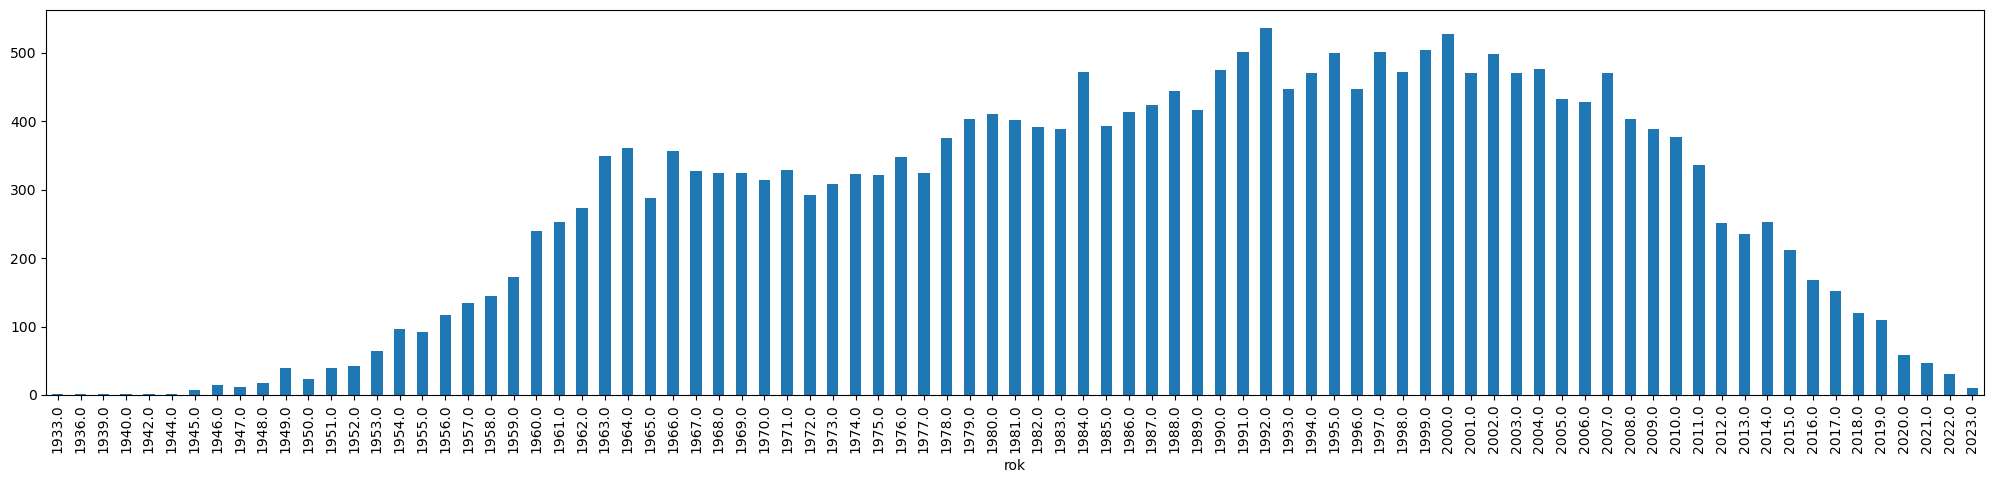

In [384]:
df.groupby('rok').size().plot.bar(figsize=(25,5))

In [439]:
', '.join(df.explode("655_a").groupby("655_a").size().nlargest(200).index.to_list())

"učebnice vysokých škol, studie, česká poezie, monografie, příručky, publikace pro děti, Czech poetry, české romány, monographs, Czech fiction, sborníky, studies, populárně-naučné publikace, textbooks (higher), biografie, fotografické publikace, children's literature, essays, informační publikace, autobiografické vzpomínky, obrazové publikace, přehledy, české příběhy, handbooks and manuals, autobiographical reminiscences, popular works, photographical works, české povídky, biography, úvahy, katalogy výstav, Czech stories, literatura faktu, brožury, české prózy, eseje, rozhovory, vzpomínky, information publications, výbory, surveys, pictorial works, Czech prose, pojednání, příběhy, non-fiction, učebnice středních škol, interviews, česká dramata, publikace pro mládež, metodické příručky, české pohádky, Czech short stories, průvodce, poezie, dokumenty, romány, detektivní romány, jubilejní publikace, miscellanea, autobiografie, učební texty, reminiscences, kuchařské recepty, Textbooks, exh

In [385]:
def kategorie(spp):
    spp = str(spp)
    if ('román' in spp) or ('příběh' in spp) or ('povídk' in spp) or ('stories' in spp) or ('próz' in spp):
        return 'próza'
    elif ('poezie' in spp) or ('poetry' in spp):
        return 'poezie'
    elif ('vzpomínk' in spp) or ('reminisc' in spp):
        return 'vzpomínky'
    else:
        return None

In [386]:
df['kategorie'] = df['655_a'].apply(lambda x: kategorie(x))

In [387]:
df['kategorie'].sample(20)

001
ck8605219              None
cpk19970216476         None
bk195302151            None
nkc20213311633         None
bk515500515            None
nkc20132473746         None
bk197400177            None
bk198203414            None
nkc20051626802         None
cpk19990740555       poezie
ck8700819              None
cpk19970279771         None
cpk20041488607       poezie
bk196203809            None
bk196800982            None
ck9102182         vzpomínky
nkc20070534070         None
bk197103387            None
nkc20081834873         None
nkc20081802296         None
Name: kategorie, dtype: object

<Axes: xlabel='rok'>

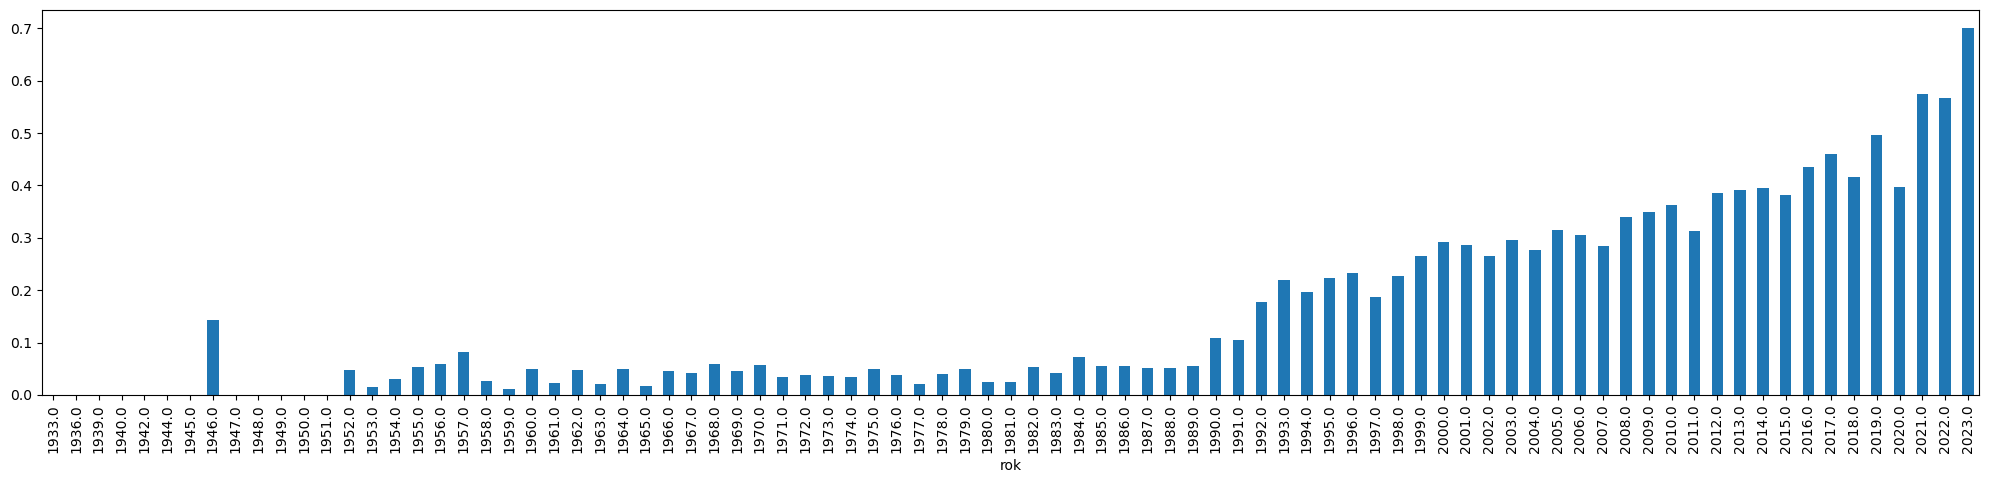

In [388]:
(df[df['kategorie'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [389]:
df.groupby(['vek','kategorie']).size()

vek   kategorie
22.0  poezie        3
24.0  poezie        3
      próza         1
25.0  próza         1
26.0  poezie        5
      próza         1
27.0  próza         4
28.0  poezie        3
      próza         6
      vzpomínky     1
29.0  poezie        4
      próza         9
30.0  poezie        4
      próza         7
      vzpomínky     1
31.0  poezie        5
      próza         7
32.0  poezie        4
      próza         9
      vzpomínky     1
33.0  poezie        7
      próza        13
34.0  poezie        6
      próza        21
35.0  poezie        6
      próza        14
36.0  poezie        6
      próza        12
37.0  poezie        2
      próza        10
38.0  poezie        9
      próza        20
39.0  poezie        5
      próza        20
40.0  poezie        6
      próza        25
41.0  poezie        5
      próza        23
      vzpomínky     1
42.0  poezie        6
      próza        17
      vzpomínky     1
43.0  poezie        9
      próza        20
44.0  poezie    

In [390]:
vysledek = pd.DataFrame(df.groupby(['vek','kategorie']).size()).reset_index(drop=False).pivot_table(index='vek', columns='kategorie', values='kategorie', aggfunc='sum', fill_value=0)

In [391]:
vysledek

kategorie,poezie,próza,vzpomínky
vek,,,
22.0,3,0,0
24.0,3,1,0
25.0,0,1,0
26.0,5,1,0
27.0,0,4,0
28.0,3,6,1
29.0,4,9,0
30.0,4,7,1
31.0,5,7,0


<Axes: xlabel='vek'>

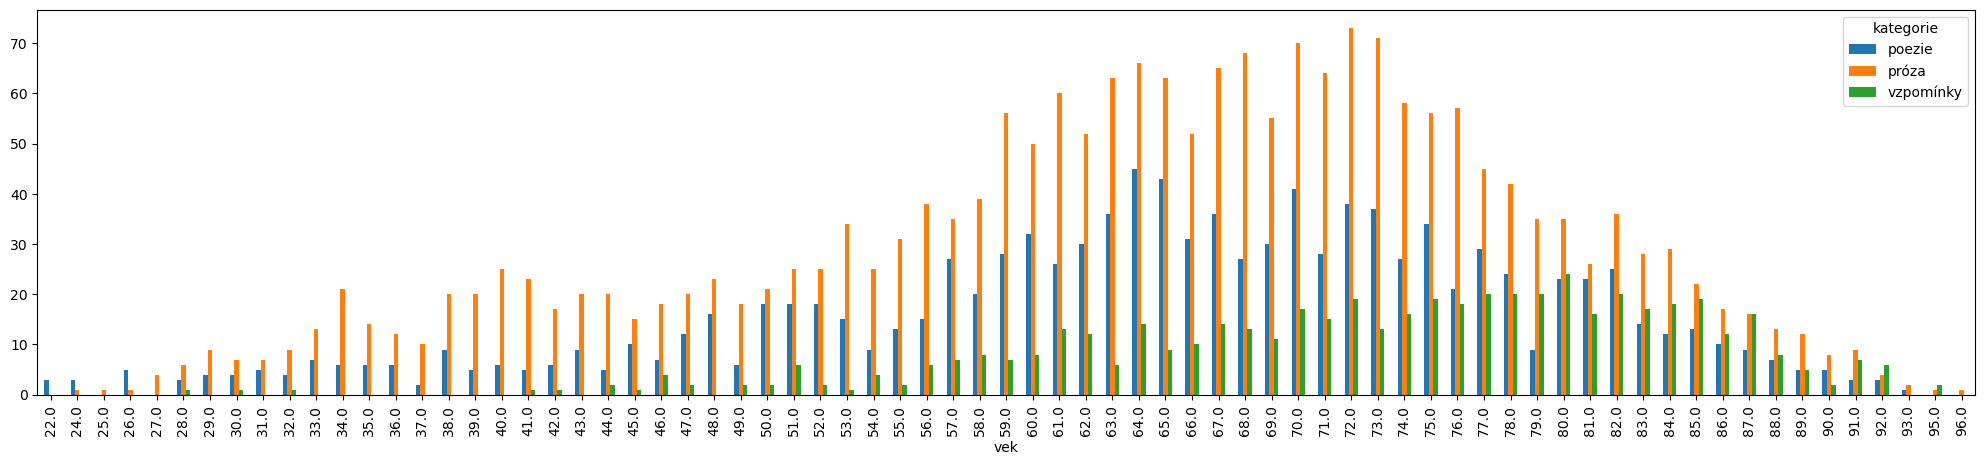

In [392]:
vysledek.plot.bar(figsize=(25,5))

In [393]:
kolikremesel = df.groupby('100_7')['kategorie'].nunique()
kolikermesel = kolikremesel[kolikremesel > 0]
pd.DataFrame(kolikermesel).groupby('kategorie').size() / len(kolikermesel)

kategorie
1    0.737898
2    0.232586
3    0.029516
dtype: float64

In [394]:
pd.DataFrame(kolikermesel).groupby('kategorie').size()

kategorie
1    625
2    197
3     25
dtype: int64

In [441]:
df2 = df[['rok','vek','655_a']].explode('655_a')

In [447]:
nejcastejsi_kategorie = df2.groupby('655_a').size()
nejcastejsi_kategorie = nejcastejsi_kategorie[nejcastejsi_kategorie >= 100]
nejcastejsi_kategorie = nejcastejsi_kategorie.index.to_list()

In [451]:
df2[df2['655_a'].isin(nejcastejsi_kategorie)].groupby('655_a')['vek'].median().sort_values()

655_a
česká dramata                     41.0
české novely                      53.0
metodické příručky                55.0
brožury                           56.0
učebnice vysokých škol            58.0
učebnice středních škol           58.0
průvodce                          58.5
publikace pro mládež              59.5
poezie                            60.0
bibliofilie                       60.0
kuchařské recepty                 61.0
informační publikace              61.0
učební texty                      62.0
studie                            62.0
katalogy výstav                   62.0
romány                            62.0
příručky                          62.0
učebnice                          63.0
publikace pro děti                64.0
monografie                        65.0
dokumenty                         65.0
výbory                            65.0
jubilejní publikace               65.0
fotografické publikace            65.0
populárně-naučné publikace        66.0
biografie          